In [34]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [27]:
word_annotations = {
 'dog': 'animal',
 'elephant': 'animal',
 'snake': 'animal',
 'pig': 'animal',
 'cow': 'animal',
 'fish': 'animal',
 'cat': 'animal',
 'steak': 'meal',
 'kebab': 'meal',
 'pork': 'meal',
 'salad': 'meal',
 'tomato': 'meal',
 'onion': 'meal',
 'car': 'vehicle',
 'motorcycle': 'vehicle',
 'bike': 'vehicle',
 'plane': 'vehicle',
 'skateboard': 'vehicle',
 'helicopter': 'vehicle',
 'bicycle': 'vehicle',
 'computer': 'device',
 'keyboard': 'device',
 'monitor': 'device',
 'cpu': 'device',
 'tv': 'device',
 'phone': 'device',
}

categories = {'animal':'green', 'meal':'blue', 'vehicle':'yellow', 'device':'red'}


In [25]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


D:\dev\neural-semantic-embeddings\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\dev\neural-semantic-embeddings\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


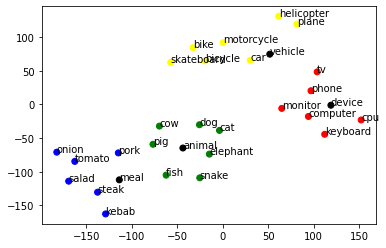

In [28]:
X = []

# Spaghetti code - clean it later
words = list(word_annotations.keys()) + list(categories.keys())

for col in words:
    X.append(glove_vectors[col])
  

tsne = TSNE(n_components=2, n_iter=3000, random_state=np.random.RandomState(20), perplexity=10)
X_tsne = tsne.fit_transform(X)

c = [categories[word_annotations[x]] if x in word_annotations.keys() else 'black'  for x in words]

fig, ax = plt.subplots()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=c)

for i, txt in enumerate(X):
    ax.annotate(words[i], (X_tsne[:, 0][i], X_tsne[:, 1][i]))

In [88]:
word_annotations = {
    'animal': ['dog', 'elephant', 'snake', 'pig', 'cow', 'fish', 'cat'],
    'meal': ['steak', 'kebab', 'pork', 'salad', 'tomato', 'onion'],
    'vehicle': ['car', 'motorcycle', 'bike', 'plane', 'skateboard', 'helicopter', 'bicycle'],
    'device': ['computer', 'keyboard', 'monitor', 'cpu', 'tv', 'phone']
}

In [90]:
# MEAN DISTANCE OF ALL WORDS TO THEIR CATEGORY WORD, I.E. DOG TO ANIMAL, COMPUTER TO DEVICE ETC.
mean_distance_dict = { i : 0 for i in word_annotations.keys() }

for k,v in word_annotations.items():
    for word in v:
        mean_distance_dict[k] += distance.cosine(glove_vectors[k], glove_vectors[word])
    mean_distance_dict[k] /= len(v)
mean_distance_dict

{'animal': 0.5259458252361843,
 'meal': 0.6314259842038155,
 'vehicle': 0.566010866846357,
 'device': 0.6418832466006279}

In [110]:
# MEAN DISTANCE OF ALL WORDS TO MEAN VECTOR OF ALL WORDS IN CATEGORY
category_vectors = { i : 300*[0] for i in word_annotations.keys() }
category_vectors

mean_distance_dict = { i : 0 for i in word_annotations.keys() }
mean_distance_dict

for k,v in word_annotations.items(): 
    for word in v:
        category_vectors[k] = map(sum, zip(category_vectors[k],glove_vectors[word])) 
    category_vectors[k] = np.divide(list(category_vectors[k]), len(v))
    
    for word in v:
        mean_distance_dict[k] += distance.cosine(category_vectors[k], glove_vectors[word])
    mean_distance_dict[k] /= len(v)

mean_distance_dict

{'animal': 0.30942248204989337,
 'meal': 0.2890694909942784,
 'vehicle': 0.32076485639194025,
 'device': 0.37352369083595766}

In [102]:
len(glove_vectors[word])

300